In [9]:
%matplotlib inline
import numpy
import pandas
import pandas as pd
import numpy as np
import matplotlib
import datetime

In [10]:
todays_date = datetime.datetime.now().date()
L = 60 * 60 * 24 * 7 # N days
index = pd.date_range(todays_date, periods=L, freq='s')
# random walk + gaussian noise
matrix = (np.cumsum(np.random.randn(L, 1)) + 30 * np.random.randn(1, L)).transpose()
# perform a random walk by summing f
df_original = pd.DataFrame(matrix, index=index, columns=['V']).reset_index()

In [11]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

def round(df, floor):
    df = df.copy()
    df['rounded_time'] = pd.DatetimeIndex(df['index']).floor(floor) 
    return df

def do_all_aggregates(df):
    # include 'count': 'count' if count is needed
    return df.groupby('rounded_time').agg({
        'V': {
            'p10': percentile(10),
            'p50': percentile(50),
            'p95': percentile(95),
            'p99': percentile(99),
            'p999': percentile(99),
        }
    })

In [12]:
# show sample execution
do_all_aggregates(round(df_original, '240min')).head()

V                                      \
                            p10         p99        p999         p50   
rounded_time                                                          
2017-05-22 00:00:00 -207.917627   42.343090   42.343090 -133.463525   
2017-05-22 04:00:00 -227.410017  -78.370631  -78.370631 -177.067012   
2017-05-22 08:00:00 -308.336116 -112.020931 -112.020931 -219.275050   
2017-05-22 12:00:00 -535.746316 -320.622232 -320.622232 -466.248218   
2017-05-22 16:00:00 -592.920723 -310.673202 -310.673202 -444.851767   

                                 
                            p95  
rounded_time                     
2017-05-22 00:00:00   11.295941  
2017-05-22 04:00:00 -105.612010  
2017-05-22 08:00:00 -139.057149  
2017-05-22 12:00:00 -355.432530  
2017-05-22 16:00:00 -340.087306

In [13]:
def plot_with_floor(floor):
    df = round(df_original, floor)
    df_agg = do_all_aggregates(df)
    df_agg.plot(title="Bin size: %s" % floor)

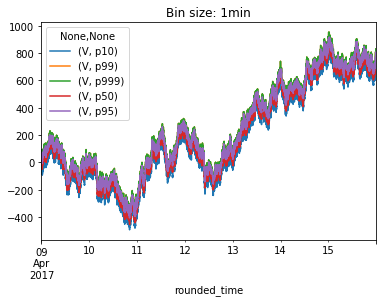

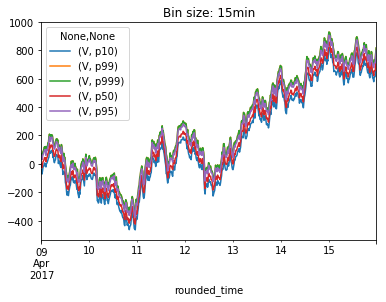

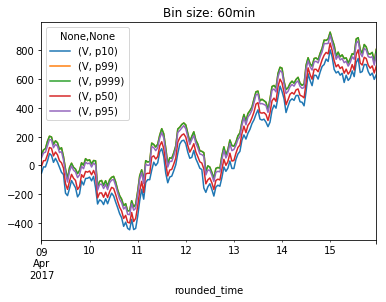

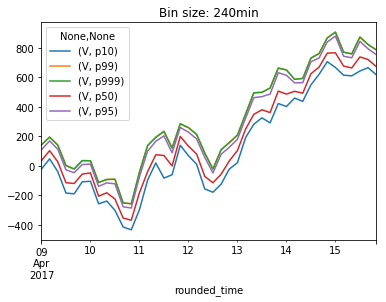

In [6]:
# plot everything
plot_with_floor('1min')
plot_with_floor('15min')
plot_with_floor('60min')
plot_with_floor('240min')

In [22]:
df = pandas.DataFrame([
    [1, 'A', 3],
    [1, 'B', 3],
    [2, 'A', 4],
    [2, 'B', 5],
], columns=['ts', 't', 'value'])
df.pivot(index='ts', columns='t')

In [24]:
dfp = df.pivot(index='ts', columns='t')

In [26]:
print str(dfp)

   value   
t      A  B
ts         
1      3  3
2      4  5
